In [1]:
#imports for used packages 
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import binascii
import os
os.getcwd()

'c:\\Users\\amblu\\Desktop\\RSAC-DEMO\\code'

In [2]:
# read audio samples
samplerate, sampledata = read("..\\audiosamples\\waves\\POC-T2.wav")
totalsamples = len(sampledata)
totaltime_s = totalsamples/samplerate

In [3]:
samplerate

44100

In [4]:
sampledata

array([-319,  -49,  284, ..., -237, -159,  125], dtype=int16)

In [5]:
totalsamples

2487808

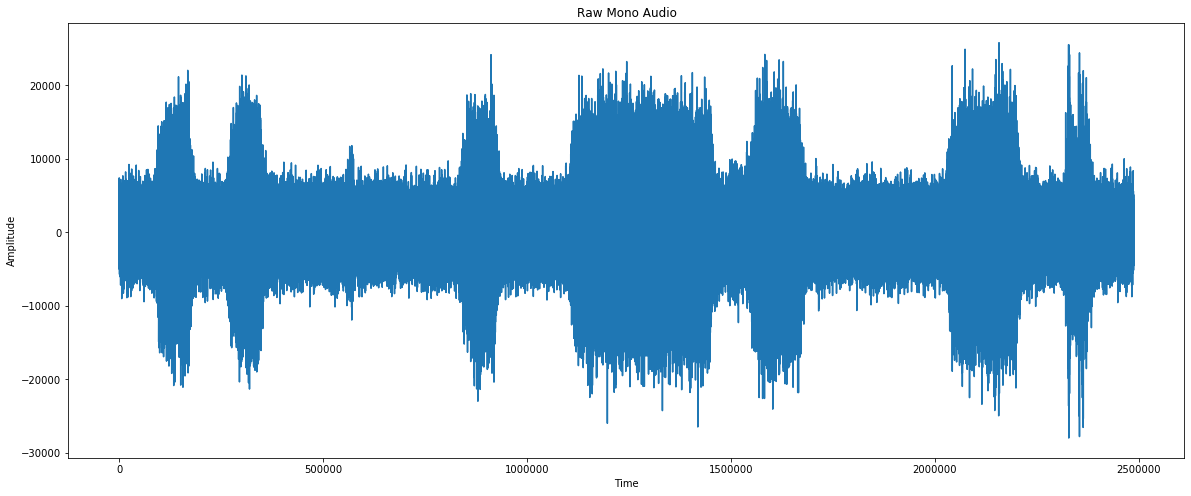

In [6]:
#plotting initial samples
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Raw Mono Audio")
plt.show()

In [7]:
#change values to postive values

sampledata = np.absolute(sampledata)

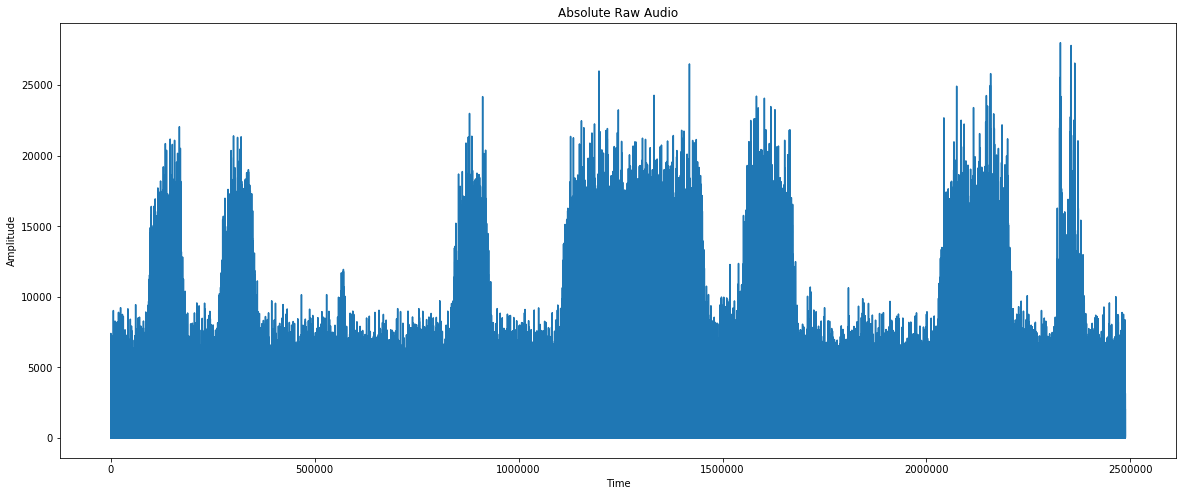

In [8]:
##abs value plot
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Absolute Raw Audio")
plt.show()

2790.1002609526136
0
28002
[319  49 284 ... 237 159 125]
2427645
[652285 561344 421460 285180 182233 118505  79678  56557  40748  29625
  20504  14491   9485   6067   3908   5368    351     19]
[    0  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000
 12000 13000 14000 15000 20000 25000 30000]


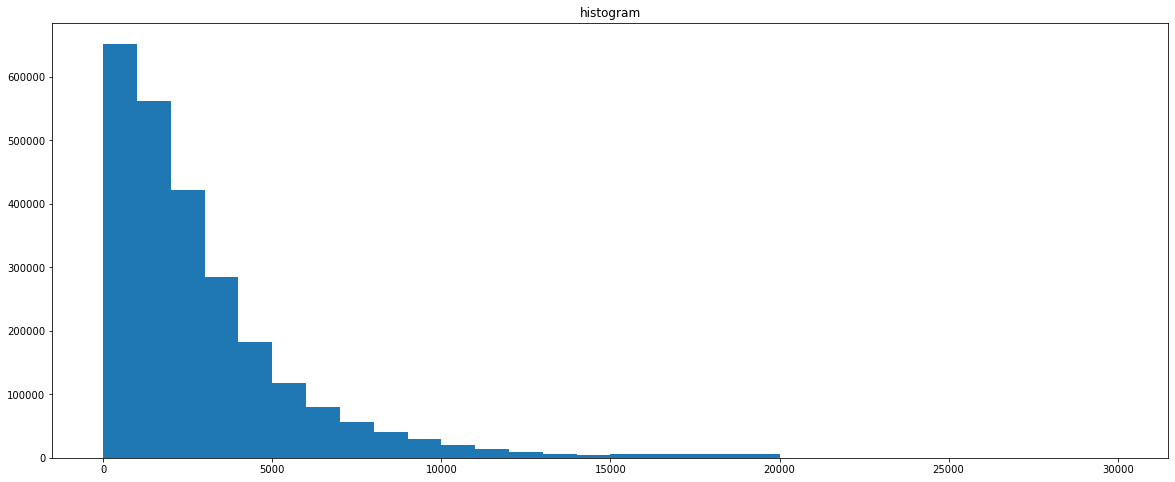

In [9]:
print(np.mean(sampledata))
print(np.amin(sampledata))
print(np.amax(sampledata))
zero_freq = sampledata[(sampledata <= 10000)]
print(zero_freq)
print(len(zero_freq))
np.histogram(sampledata,bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,25000,30000]) 
hist,bins = np.histogram(sampledata,bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,25000,30000]) 
print(hist) 
print(bins)
plt.figure(figsize=(20, 8))
plt.hist(sampledata, bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,25000,30000]) 
plt.title("histogram") 
plt.show()

2790.1002609526136
92610


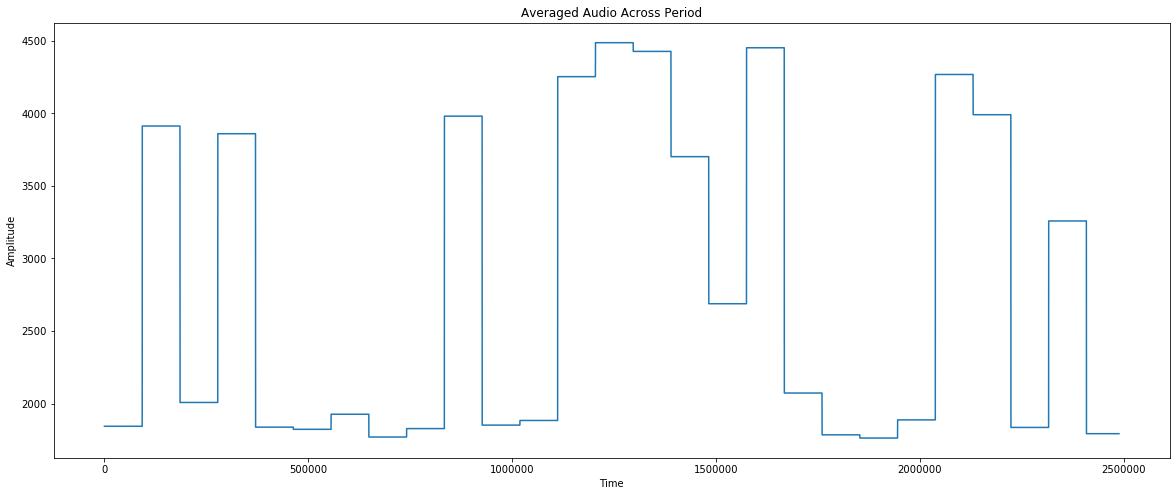

In [10]:
# grab mean of data for later use

average_amplitude = np.mean(sampledata)
print(average_amplitude)
# Transform data to a mean across a specific period (non moving mean)

# seconds used for data transmit in bits per second in transmit file 
seconds = 2

#seconds converted to a value of total samples
window = seconds * samplerate * 1.05
window = round(window, 0)
window = int(window)
print(window)

#calculate number of windows in dataset
total_windows = totalsamples/window
#run through data set and set values in each window equal to the mean of the window
i = 0
s = 0
f = window
while i < total_windows:
    average = np.mean(sampledata[s:f])
    sampledata[s:f] = average
    s+=window
    f+=window
    i+=1

# Make equal to the period of listening need to find a way to get close to the begining like a start signal.....
##abs value plot
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Averaged Audio Across Period")
plt.show()

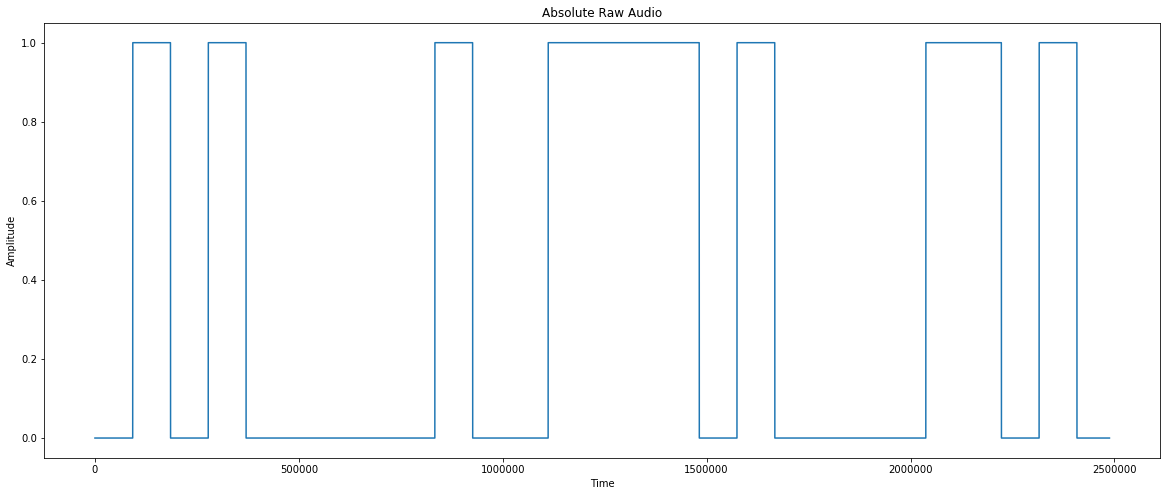

In [11]:
#then set all equal to specific averages.

#amplitude average modification
average_amplitude = average_amplitude * 1.05

sampledata[(sampledata < average_amplitude)] = 0
sampledata[(sampledata > average_amplitude)] = 1



##abs value plot
plt.figure(figsize=(20, 8))
plt.plot(sampledata[0:totalsamples-1])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Absolute Raw Audio")
plt.show()

In [12]:
#now need to turn that into 1 & 0
i = 1
halfp = int(window/2)
binString = ''
while i < total_windows:
    binString += str(sampledata[halfp-1])
    halfp+=window
    i+=1
binString    

'01010000010011110100001101'

In [13]:
len(binString)

26

In [14]:
print(binString)

01010000010011110100001101


In [15]:
#delete zeros and then add a zero
a = 0
while a == 0:
    if binString[0] == "0":
        binString = binString[1:]
    elif binString[0] == "1":
        a = 1
        print(binString)

binString = "0"+binString

print(binString)
    

1010000010011110100001101
01010000010011110100001101


In [16]:
r = len(binString) % 8
print(r)
i = len(binString) - r
print(i)
i += 1
binString = binString[0:i-1]
len(binString)
binString

2
24


'010100000100111101000011'

In [17]:
binString

'010100000100111101000011'

In [18]:
#binString = binString.encode("utf-8")
binString = binString
n = int(binString, 2)
print(n)

n.to_bytes((n.bit_length() + 7) // 8, 'big').decode()

5263171


'POC'